¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [1]:
pip install scikit-learn --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 103.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
186,0,22.0,50800.0,0,0
2517,0,43.0,37500.0,0,1
585,1,45.0,54200.0,0,1
1277,1,26.0,62800.0,0,0
3694,1,29.0,50800.0,0,0
3649,1,25.0,60400.0,0,0
3974,1,35.0,48200.0,1,0
2428,0,29.0,43400.0,1,0
1805,1,45.0,35700.0,1,1
1830,0,22.0,44100.0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:
df['age'] = df['age'].astype(int)


In [8]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

In [10]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


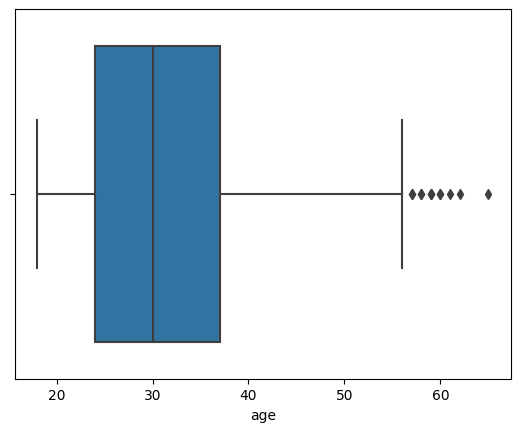

In [11]:
#Revisión de outliers

sns.boxplot(x=df['age'])
   

plt.show()

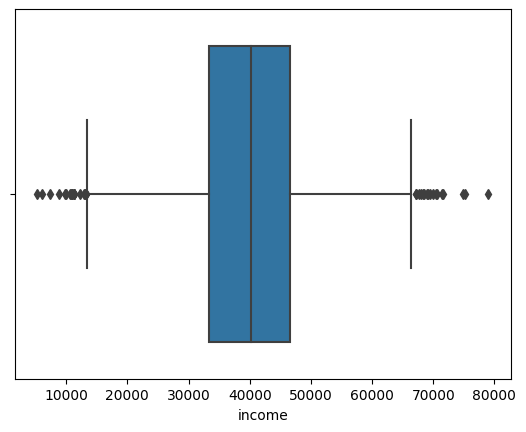

In [12]:
#Revisión de outliers

sns.boxplot(x=df['income'])
   

plt.show()

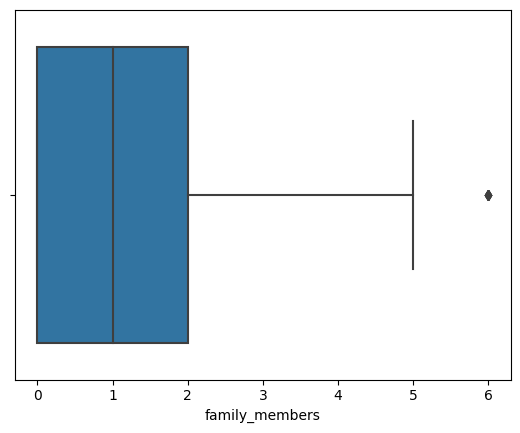

In [13]:
#Revisión de outliers

sns.boxplot(x=df['family_members'])
   

plt.show()

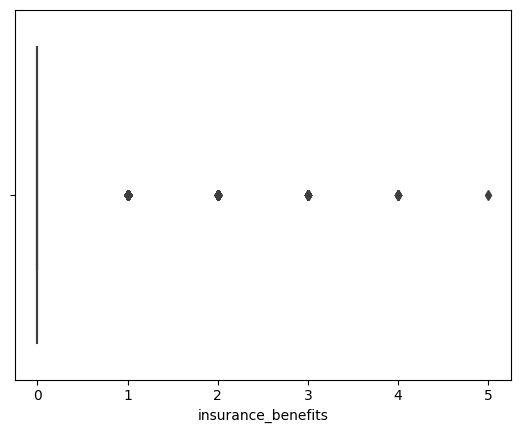

In [14]:
#Revisión de outliers

sns.boxplot(x=df['insurance_benefits'])
   

plt.show()

A nivel de revisión de estadística descriptiva y de outliers no se observan datos fuera de lo común

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien! Importaste de forma correcta las librerías y módulos, cambiaste el formato de los nombres y verificaste que no hubiera outliers inválidos en los datos.
</div>

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

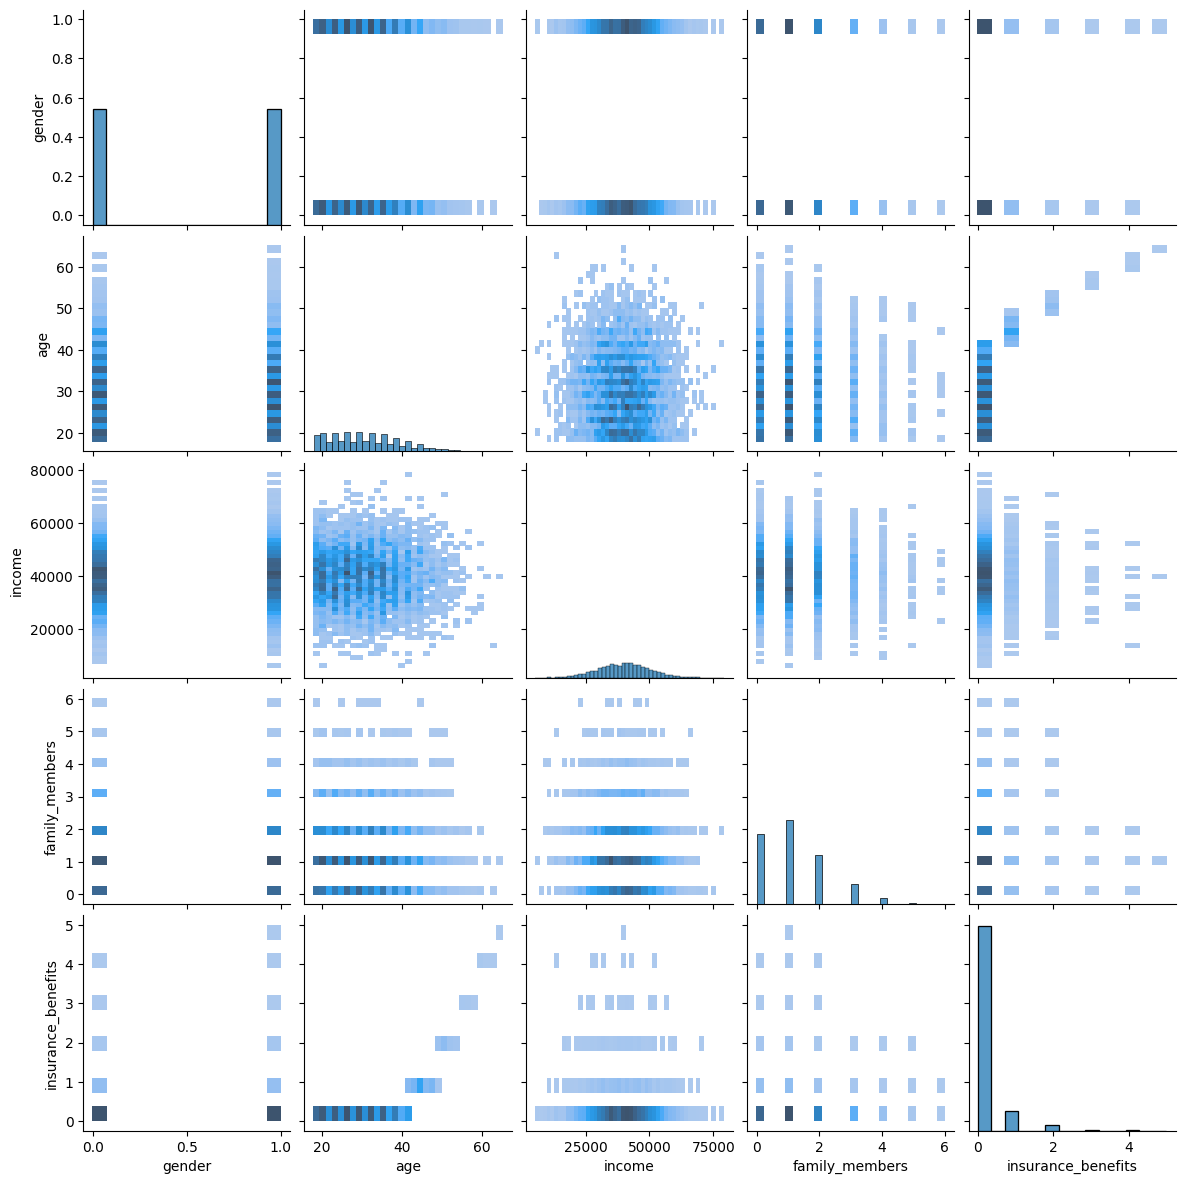

In [15]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de la gráfica de pares. 
</div>

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [16]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [17]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: número de objetos para los que se buscan los vecinos más cercanos    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names])# <tu código aquí> 
    
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

In [18]:
# Llamar a la función get_knn para distancia euclidiana y manhattan, sin escalado

print('Prueba de la función KNN con métrica Euclidiana')
print()
print('Combinación 1')
print()
result = get_knn(df, 0, 3, 'euclidean')
print(result)
print()
print('Combinación 2')
print()
result = get_knn(df, 2, 5, 'euclidean')
print(result)


print()

print('Prueba de la función KNN con métrica Manhattan')
print()
print('Combinación 1')
print()
result = get_knn(df, 0, 3, 'manhattan')
print(result)
print()
print('Combinación 2')
print()
result = get_knn(df, 2, 5, 'manhattan')
print(result)

Prueba de la función KNN con métrica Euclidiana

Combinación 1

      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               1                   0  0.000000
2022       1   41  49600.0               0                   0  1.000000
1225       0   42  49600.0               0                   1  1.732051

Combinación 2

      gender  age   income  family_members  insurance_benefits    distance
2          0   29  21000.0               0                   0    0.000000
4544       1   31  21000.0               1                   0    2.449490
2031       0   30  20900.0               0                   0  100.005000
1741       1   28  21100.0               0                   0  100.010000
4805       0   28  21100.0               2                   0  100.024997

Prueba de la función KNN con métrica Manhattan

Combinación 1

      gender  age   income  family_members  insurance_benefits  distance
0          1   41  49600.0               

Escalar datos.

In [19]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [20]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
3615,1.0,0.384615,0.512658,0.333333,0
2529,1.0,0.661538,0.462025,0.333333,1
3595,1.0,0.538462,0.535443,0.000000,0
2029,0.0,0.369231,0.453165,0.666667,0
1459,1.0,0.415385,0.502532,0.500000,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [21]:
# Llamar a la función get_knn para distancia euclidiana y manhattan, escalado

print('Prueba de la función KNN con métrica Euclidiana escalada')
print()
print('Combinación 1')
print()
result = get_knn(df_scaled, 0, 3, 'euclidean')
print(result)




Prueba de la función KNN con métrica Euclidiana escalada

Combinación 1

      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.017754


In [22]:
print()

print('Prueba de la función KNN con métrica Manhattan escalada')
print()
print('Combinación 1')
print()
result = get_knn(df_scaled, 0, 3, 'manhattan')
print(result)


Prueba de la función KNN con métrica Manhattan escalada

Combinación 1

      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                   0  0.000000
2689     1.0  0.630769  0.634177        0.166667                   0  0.006329
133      1.0  0.615385  0.636709        0.166667                   0  0.024245


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Que los datos no estén escalados, definitivamente afecta al algoritmo KNN, consecuencia de esto, se pueden tener resultados sesgados ya que las características con las escalas más grandes tienen una influencia desproporcionada en la determinación de los vecinos.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Los resultados son cercanos entre si pero definitivamente difieren en sus distancias por la forma en que se calcula cada métrica, en la práctica esto podría influir en los resultados y en la interpretación de los datos del análisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien implementado el modelo. Como acabas de notar, el escalado es muy importante debido a que permite que variables numéricas con rangos muy diferentes sean comparables. Sin escalar los datos las características con valores más grandes pueden dominar las métricas de distancia y no obtener resultados precisos.
</div>

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [23]:
# сalcula el objetivo
df['insurance_benefits_received'] = df['insurance_benefits'] > 0#<tu código aquí>

In [24]:
df

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,False
1,0,46,38000.0,1,1,True
2,0,29,21000.0,0,0,False
3,0,21,41700.0,2,0,False
4,1,28,26100.0,0,0,False
...,...,...,...,...,...,...
4995,0,28,35700.0,2,0,False
4996,0,34,52400.0,1,0,False
4997,0,20,33900.0,2,0,False
4998,1,22,32700.0,3,0,False


In [25]:
# comprueba el desequilibrio de clases con value_counts()

df['insurance_benefits_received'].value_counts()

# <tu código aquí>

False    4436
True      564
Name: insurance_benefits_received, dtype: int64

Se puede observar claramente que las personas que no han sido beneficiarias de seguro son mayoria y son menos del 1% del total de asegurados

In [26]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all'))

In [27]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [28]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P,len(df['insurance_benefits_received']))# <tu código aquí> 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



In [29]:
def kclass(x_train, y_train,x_test,y_test, k, metric_to_use):
    
    """
    Devuelve los k vecinos más cercanos

    :param x_train: datos caracteristicas de entrenamiento
    :param y_train: datos objetivo entrenamiento
    :param x_test: datos caracteristicas de prueba
    :param y_test: datos prueba objetivo
    :param k: número de vecinos más cercanos a devolver
    :param metric_to_use: nombre de la métrica de distancia: ‘euclidean’,‘manhattan’   """

    k_class = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, metric=metric_to_use)
    k_class.fit(x_train.values,y_train.values)
    y_pred = k_class.predict(x_test)
    
    print(eval_classifier(y_test,y_pred))
    print()
    print(sklearn.metrics.classification_report(y_test,y_pred))

In [30]:
#Ejercicio sin escalado

x_train, x_test, y_train, y_test = train_test_split(df[feature_names],df['insurance_benefits_received'],test_size = 0.30,random_state=54321)

In [31]:
kclass(x_train, y_train, x_test, y_test,8, 'euclidean')

F1: 0.01
Matriz de confusión
[[8.92000000e-01 0.00000000e+00]
 [1.07333333e-01 6.66666667e-04]]
None

              precision    recall  f1-score   support

       False       0.89      1.00      0.94      1338
        True       1.00      0.01      0.01       162

    accuracy                           0.89      1500
   macro avg       0.95      0.50      0.48      1500
weighted avg       0.90      0.89      0.84      1500



In [32]:
kclass(x_train, y_train, x_test, y_test,8, 'manhattan')

F1: 0.01
Matriz de confusión
[[8.92000000e-01 0.00000000e+00]
 [1.07333333e-01 6.66666667e-04]]
None

              precision    recall  f1-score   support

       False       0.89      1.00      0.94      1338
        True       1.00      0.01      0.01       162

    accuracy                           0.89      1500
   macro avg       0.95      0.50      0.48      1500
weighted avg       0.90      0.89      0.84      1500



In [33]:
#Se realiza el ejercicio con el DF escalado

x_train, x_test, y_train, y_test = train_test_split(df_scaled[feature_names],df['insurance_benefits_received'],test_size = 0.33,random_state=92)

In [34]:
kclass(x_train, y_train, x_test, y_test,8, 'euclidean')

F1: 0.88
Matriz de confusión
[[0.89454545 0.00242424]
 [0.01939394 0.08363636]]
None

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1480
        True       0.97      0.81      0.88       170

    accuracy                           0.98      1650
   macro avg       0.98      0.90      0.94      1650
weighted avg       0.98      0.98      0.98      1650



In [35]:
kclass(x_train, y_train, x_test, y_test,8, 'manhattan')

F1: 0.89
Matriz de confusión
[[0.89515152 0.00181818]
 [0.01818182 0.08484848]]
None

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1480
        True       0.98      0.82      0.89       170

    accuracy                           0.98      1650
   macro avg       0.98      0.91      0.94      1650
weighted avg       0.98      0.98      0.98      1650



Los resultados del ejercicio indican nuevamente que el escalado de los datos entregan mejores resultados, mostrando la que la la métrica f1 ha aumentando considerablemente y los falsos negativos han disminuido también.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente! Como pudiste observar el F1 usando el clasificador basado en KNN es mucho mayor que el del modelo aleatorio. Además, usando datos escalados el F1 aumenta todavía más, ya que evitar que el efecto de las variables con valores más grandes dominen sobre aquellas con valores más pequeños.
</div>

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [36]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y# <tu código aquí>

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)# <tu código aquí>
        y_pred = X2 @ self.weights# <tu código aquí>
        
        return y_pred

In [37]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [38]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [39]:
#Se realiza el ejercicio con datos escalados

X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [40]:
lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo implementando el modelo de regresión lineal tanto para los datos originales como los escalados. Como pudiste notar, el usar un conjunto u otro no afecta a los resultados obtenidos por el modelo, cuál sería tu interpretación de este hecho?
</div>

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [41]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [42]:
X = df_pn.to_numpy()
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Generar una matriz aleatoria $P$.

In [43]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Comprobar que la matriz P sea invertible

In [44]:
# Determina si la matriz P es invertible

det = np.linalg.det(P)

if det != 0:
    print("La matriz P es invertible.")
else:
    print("La matriz P NO es invertible.")

La matriz P es invertible.


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [45]:
X2 = X @ P
X2

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

A simple vista no sería fácil la recuperación de los datos de los usuarios, pero conociendo la matriz P sería posible

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [47]:
X_original = np.dot(X2 , np.linalg.inv(P))
print(X_original)
print()
display(df_pn)
display(pd.DataFrame(X_original,columns=personal_info_column_list))

[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]
 ...
 [-1.92837871e-12  2.00000000e+01  3.39000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.20000000e+01  3.27000000e+04  3.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  4.06000000e+04  1.00000000e+00]]



,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0
...,...,...,...,...
4995,0,28,35700.0,2
4996,0,34,52400.0,1
4997,0,20,33900.0,2
4998,1,22,32700.0,3


,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13
...,...,...,...,...
4995,-2.559766e-12,28.0,35700.0,2.000000e+00
4996,-5.486091e-12,34.0,52400.0,1.000000e+00
4997,-1.928379e-12,20.0,33900.0,2.000000e+00
4998,1.000000e+00,22.0,32700.0,3.000000e+00


Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [48]:
X[3:8]

array([[0.00e+00, 2.10e+01, 4.17e+04, 2.00e+00],
       [1.00e+00, 2.80e+01, 2.61e+04, 0.00e+00],
       [1.00e+00, 4.30e+01, 4.10e+04, 2.00e+00],
       [1.00e+00, 3.90e+01, 3.97e+04, 2.00e+00],
       [1.00e+00, 2.50e+01, 3.86e+04, 4.00e+00]])

In [50]:
X2[3:8]

array([[ 5345.60393712, 18803.22720286, 15479.14837264, 38663.06186284],
       [ 3347.17673462, 11782.82928336,  9699.99894205, 24211.27337753],
       [ 5258.77025195, 18509.8596165 , 15237.19342704, 38032.31715339],
       [ 5091.84582008, 17920.45540783, 14752.11143673, 36824.37841067],
       [ 4950.8900715 , 17413.01768645, 14334.46448264, 35794.3865001 ]])

In [51]:
X_original[3:8]

array([[-4.84498208e-12,  2.10000000e+01,  4.17000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  2.61000000e+04,
        -1.01990740e-13],
       [ 1.00000000e+00,  4.30000000e+01,  4.10000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  3.90000000e+01,  3.97000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.50000000e+01,  3.86000000e+04,
         4.00000000e+00]])

Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Durante las operaciones aritméticas se podrían haber despreciado decimales por redondeo, por lo que al recuperar la matriz original los resultados podrían no ser exactamente las mismas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente! Lograste ofuscar los datos originales de forma adecuada y después recuperarlos a través de operaciones matriciales. Si bien hay una diferencia muy pequeña entre los datos orginales y los datos recuperados, se debe a los redondeos que se están realizando al hacer las operaciones.
</div>

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

Debido a que el coeficiente de P se aplica a toda la matriz, el resultado final no se verá afectado, lo que hace que ofuscación sea un método que conserva la integridad de los datos sin afectar el análisis y las conclusiones finales.

**Prueba analítica**

# Calculamos la inversa de P
P_inv = np.linalg.inv(P)

# Calculamos (X^T * X)^-1
XTX_inv = np.linalg.inv(X.T @ X)

# Calculamos wP usando la fórmula
wP = P_inv @ XTX_inv @ X.T @ y

# Verificamos que wP = P^-1 * w
w = XTX_inv @ X.T @ y
wP_check = P_inv @ w

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena prueba! Simplificando un poco más encontrarás que \begin{align}
w_P &= P^{-1} w \\
P w_P &= P P^{-1} w \\
P w_P &= w \\
w &= P w_P \\
\end{align}
    
Esta relación entre los coeficientes de la regresión nos garantiza que las predicciones del modelo serán iguales para ambos conjuntos de datos.
</div>

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [54]:
rng = np.random.default_rng(seed=92)
P = rng.random(size=(X.shape[1],X.shape[1]))
P

array([[0.6008643 , 0.07585186, 0.35032078, 0.33361493],
       [0.0379771 , 0.85747088, 0.03500592, 0.00273546],
       [0.63681375, 0.04221099, 0.1517711 , 0.20103645],
       [0.49645795, 0.42523532, 0.4600803 , 0.68256937]])

In [55]:
#Comprueba que la matriz sea reversible
PPinv = P @ np.linalg.inv(P)
print(PPinv)
print()
PinvP = np.linalg.inv(P) @ P
print(PinvP)

np.linalg.det(PPinv),np.linalg.det(PinvP)

[[ 1.00000000e+00 -9.31292705e-17 -9.28046331e-17  1.74529169e-16]
 [ 6.90658172e-18  1.00000000e+00 -2.55515134e-18 -1.85330136e-18]
 [ 2.86470936e-17 -1.55852995e-17  1.00000000e+00  5.36824820e-17]
 [-8.87419634e-17 -3.35902557e-17  1.34417981e-16  1.00000000e+00]]

[[ 1.00000000e+00 -5.63389945e-17 -6.84365381e-17 -6.55316304e-17]
 [-4.39344801e-17  1.00000000e+00 -1.97139678e-17 -2.76679647e-17]
 [ 8.01807775e-16  8.45514992e-17  1.00000000e+00  5.72997244e-16]
 [-2.38150857e-16 -3.90376096e-17 -2.14084465e-16  1.00000000e+00]]


(0.9999999999999999, 1.0000000000000002)

In [58]:
#Ejercicio sin ofuscar

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54321)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.59392098e-01  8.18179629e-03  3.65344879e-02 -2.19473247e-07
 -1.46482430e-02]
RMSE: 0.33
R2: 0.64


In [62]:
# Test con datos ofuscados
X_train, X_test, y_train, y_test = train_test_split(X@P, y, test_size=0.3, random_state=54321)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.95939208  0.01076251  0.03724169  0.13074182 -0.14061515]
RMSE: 0.33
R2: 0.64


De las pruebas realizadas se puede observar que los valores de RMSE y R2 no se alteran si se usan datos no ofuscados u ofuscados, que es lo que se presumía inicialmente

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Como ya demostraste anteriormente no existe diferencias entre el RMSE y R2 usando los datos originales y los datos ofuscados.
</div>

# Conclusiones

* Las métricas de distancia Euclidiana y Manhattan proporcionaron resultados similares, aunque en diferente orden.

* El escalado de datos es crucial para obtener resultados precisos, ya que ayuda a dar un peso uniforme a las características y evita que las características con valores altos dominen el análisis.

* El escalado de datos reduce significativamente los falsos negativos, mejorando la precisión del modelo.

* Las pruebas con y sin escalado mostraron que el escalado mejora la clasificación correcta de los datos.

* La ofuscación de datos requiere una matriz invertible para asegurar que los datos puedan ser revertidos a su estado original.

* La ofuscación no afecta los resultados finales en la regresión lineal, siempre y cuando se conozca la matriz utilizada para la ofuscación.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [ ]  Se ha realizado la tarea 1
    - [ ]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [ ]  Se probó el procedimiento para las cuatro combinaciones propuestas    - [ ]  Se respondieron las preguntas sobre la escala/distancia- [ ]  Se ha realizado la tarea 2
    - [ ]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad    - [ ]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.- [ ]  Se ha realizado la tarea 3
    - [ ]  Se implementó la solución de regresión lineal mediante operaciones matriciales    - [ ]  Se calculó la RECM para la solución implementada- [ ]  Se ha realizado la tarea 4
    - [ ]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    - [ ]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    - [ ]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM    - [ ]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM- [ ]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión</b> <a class="tocSkip"></a>

Muy buen trabajo, Marco! Te hice un comentario en donde te sugiero complementar con una interpretación, además de que te hice unas pequeñas correcciones en el inciso final del proyecto para evitar unos errores que estaban surgiendo. Sigue esforzándote!
</div>